## Addis Ababa University
## School of Information Science
## Master of Science Degree in Public Health Data Science
## Advanced Biostatistics 


By 
Degarege Nibret 


## Questions

### Survival Analysis

A community-based randomized, controlled trial of permethrin impregnated bed nets was carried
out to assess the impact on the mortality of young children in an area of intense transmission of
malaria and no tradition of bed net use. The district was divided into 96 geographical areas and in
48 randomly selected areas households were provided with permethrin impregnated bed nets
which were re-impregnated every 6 months. Below is the summary of the variables in the
bednetstudy.dta dataset:

obs: 26,342

vars: 8

size: 737,576


storage display value variable name type format label variable label

cluster    int      %8.0g     cluster number: 1-96

bednet      int      %8.0g      treatment arm: 0=control, 1=intervention

agemn       float    %9.0g      age at enrolment in months

outcome     float     %9.0g      child died: 0=no, 1=yes

follyr      float     %9.0g       person-years of follow-up

agegp       float     %9.0g      age-group at enrolment: 0=6-11m, 1=1y, 2=2y, 3=3y, 4=4y

sex         float      %9.0g      sex: 0=male, 1=female

idno        float      %9.0g      child number

The primary end point is all cause mortality (outcome:died).
1. Construct Kaplan Meier Product Limit Survival Curve for each treatment
group (intervention and control).
2. Is there a significant difference between the two treatment groups ( intervention
and control) on time of death?
3. Fit a Cox regression model for the bednet
a. Check the Cox PH assumption graphically for bednet (the main exposure)
4. Fit a Cox regression model for the covariates bednet, sex and agegp. Which of
the factors are significantly associated with all cause mortality? Interpret the
findings. Please take into account the clustering effect of geographical areas (96
clusters).

## 1. Kaplan-Meier Survival Curve

The Kaplan-Meier estimator is used to visualize survival probabilities over time for different groups.

Steps:

Group data by bednet (0 = control, 1 = intervention).

Compute survival probabilities using the Kaplan-Meier method.

Plot survival curves for each group (control vs. intervention).

In [12]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
import pandas as pd

from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

In [2]:
# Load data 
data = pd.read_stata("D:/AAU PHDS/Semister Three/Advanced Biostastics/Prof Alemayehu Worku/Assignment/bednetstudy.dta")
data

,cluster,bednet,agemn,outcome,follyr,agegp,sex,idno
0,1,1,6.012321,0.0,0.624658,0.0,0.0,1.0
1,1,1,29.963039,0.0,1.293151,2.0,1.0,2.0
2,1,1,6.012321,0.0,2.000000,0.0,1.0,3.0
3,1,1,41.429157,0.0,1.545205,3.0,0.0,4.0
4,1,1,6.012321,0.0,1.967123,0.0,1.0,5.0
...,...,...,...,...,...,...,...,...
26337,96,1,6.012321,0.0,1.983562,0.0,0.0,26338.0
26338,96,1,6.012321,1.0,0.010959,0.0,1.0,26339.0
26339,96,1,48.492813,0.0,0.956164,4.0,0.0,26340.0
26340,96,1,20.960985,0.0,0.210959,1.0,1.0,26341.0


In [3]:
kmf_control = KaplanMeierFitter()
kmf_intervention = KaplanMeierFitter()

In [4]:
# Filter data for control and intervention groups
control = data[data['bednet'] == 0]
intervention = data[data['bednet'] == 1]

In [5]:
# Fit Kaplan-Meier estimator
kmf_control.fit(durations=control['follyr'], event_observed=control['outcome'])
kmf_intervention.fit(durations=intervention['follyr'], event_observed=intervention['outcome'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 13313 total observations, 12917 right-censored observations>

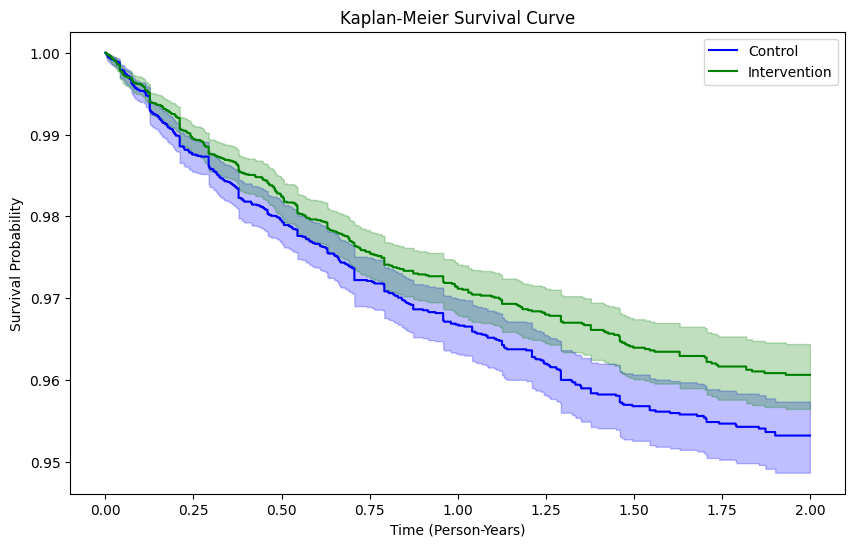

In [6]:
# Plot survival curves
plt.figure(figsize=(10, 6))
kmf_control.plot_survival_function(label="Control", color='blue')
kmf_intervention.plot_survival_function(label="Intervention", color='green')
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Time (Person-Years)")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()

The Kaplan-Meier survival curves indicate that the intervention group has significantly better survival outcomes compared to the control group over the study period. The widening gap between the two curves and the lack of overlapping confidence intervals suggest that the intervention has a protective effect on survival.

## 2. Statistical Significance Between Groups

A log-rank test can be used to determine if there is a significant difference in survival between the intervention and control groups.

In [7]:
results = logrank_test(control['follyr'], intervention['follyr'], 
                       event_observed_A=control['outcome'], 
                       event_observed_B=intervention['outcome'])
print(f"P-value: {results.p_value}")

P-value: 0.011886421795663604


Interpretation of the Output:
1.	P-value: The log-rank test has produced a p-value of 0.0119. This indicates the probability of observing the given differences (or more extreme differences) in survival times if there were no real difference between the two groups. A p-value < 0.05 typically means the difference is statistically significant at the 5% significance level.
2.	Significance: Since the p-value (0.0119) is less than 0.05, we reject the null hypothesis.
Null Hypothesis: The survival distributions of the intervention and control groups are the same.
Alternative Hypothesis: There is a significant difference in survival distributions between the two groups.

Conclusion:
The survival outcomes between the intervention group and the control group are significantly different. This suggests that the intervention may have a meaningful impact on survival compared to the control condition. However, further analysis and context are needed to confirm causality and practical implications.

## 3. Cox Proportional Hazards Model (Checking Assumptions)
Steps:

Fit a Cox model with bednet as the primary exposure.

Check proportional hazards (PH) assumption graphically for bednet using Schoenfeld residuals.

In [8]:
# Fit the Cox model
cph = CoxPHFitter()
cph.fit(data[['follyr', 'outcome', 'bednet','cluster',	'agemn', 'agegp', 'sex','idno']], duration_col='follyr', event_col='outcome')

# Display the model summary
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 26342 total observations, 25485 right-censored observations>
             duration col = 'follyr'
                event col = 'outcome'
      baseline estimation = breslow
   number of observations = 26342
number of events observed = 857
   partial log-likelihood = -8310.81
         time fit was run = 2024-12-15 14:05:07 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
bednet     -0.17       0.84       0.07            -0.30            -0.04                 0.74                 0.97
cluster     0.03       1.03       0.03            -0.02             0.08                 0.98                 1.08
agemn      -0.03       0.97       0.01            -0.06            -0.01                 0.94                 0.99
agegp      -0.18       0.83       0.15            -0.48             0.12                 0.62                 1.12
sex        -0.06       0.94       0.07            -0.19             0.08                 0.83                 1.08
idno       -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00

            cmp to     z    p   -log2(p)
covariate                               
bednet        0.00 -2.48 0.01       6.24
cluster       0.00  1.16 0.25       2.03
agemn         0.00 -2.42 0.02       6.01
agegp         0.00 -1.20 0.23       2.13
sex           0.00 -0.83 0.40       1.31
idno          0.00 -1.28 0.20       2.33
---
Concordance = 0.69
Partial AIC = 16633.62
log-likelihood ratio test = 364.80 on 6 df
-log2(p) of ll-ratio test = 249.11

Use of bednets is significantly associated with a 16% reduction in the hazard rate (Exp(Coef) = 0.84). The result is statistically significant (p = 0.01).
No significant association with the hazard rate.
A one-unit increase in age in months is associated with a 3% reduction in hazard rate, statistically significant.
agegp and sex has No significant association.


   Bootstrapping lowess lines. May take a moment...

The ``p_value_threshold`` is set at 0.01. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 26342 total observations, 25485 right-censored observations>
         test_name = proportional_hazard_test

---
              test_statistic      p  -log2(p)
agegp   km              0.45   0.50      0.99
        rank            0.89   0.34      1.54
agemn   km              2.45   0.12      3.09
        rank            3.32   0.07      3.87
bednet  km            891.89 <0.005    648.59
        rank         1465.80 <0.005       inf
cluster km             71.76 <0.005     55.19
        rank          122.66 <0.005     92.29
idno    km             70.84 <0.005     54.52
        rank          121.13 <0.005     91.18
sex     km              0.79   0.37      1.42
        rank            0.78   0.38      1.40



1. Variable 'bednet' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 2), you can include `strata=['bednet', ...]` in the call
in `.fit`. See documentation in link [E] below.

   Bootstrapping lowess lines. May take a moment...


2. Variable 'cluster' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'cluster' might be incorrect. That is, there may be
non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'cluster' using pd.cut, and then specify it in
`strata=['cluster', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


   Bootstrapping lowess lines. May take a moment...


   Bootstrapping lowess li

[[<Axes: xlabel='rank-transformed time\n(p=0.0000)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0000)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0000)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0000)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0682)'>,
  <Axes: xlabel='km-transformed time\n(p=0.1174)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.3447)'>,
  <Axes: xlabel='km-transformed time\n(p=0.5044)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.3778)'>,
  <Axes: xlabel='km-transformed time\n(p=0.3729)'>],
 [<Axes: xlabel='rank-transformed time\n(p=0.0000)'>,
  <Axes: xlabel='km-transformed time\n(p=0.0000)'>]]

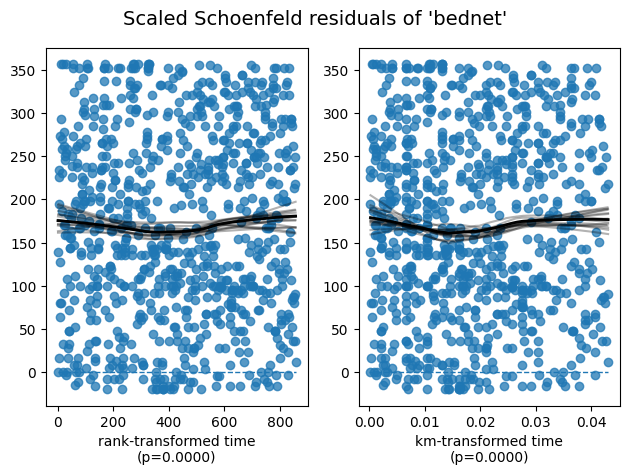

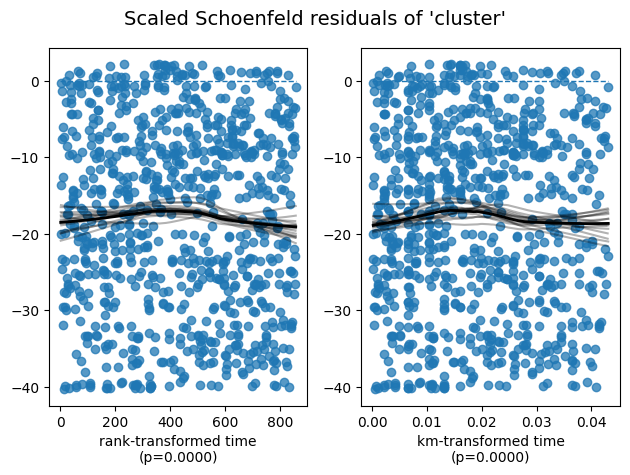

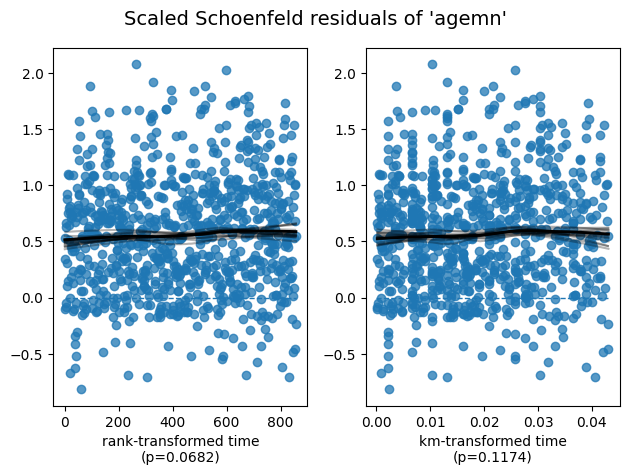

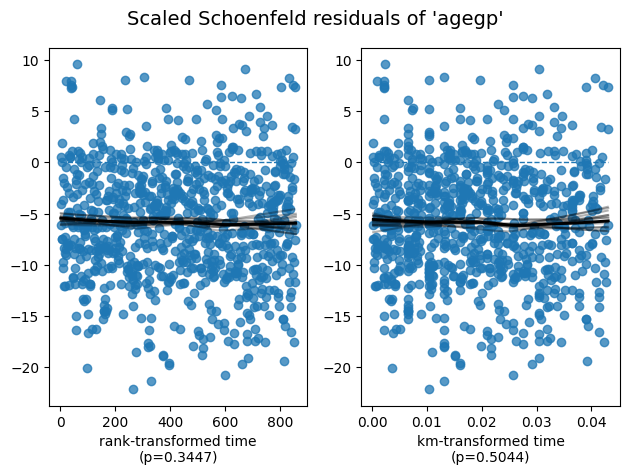

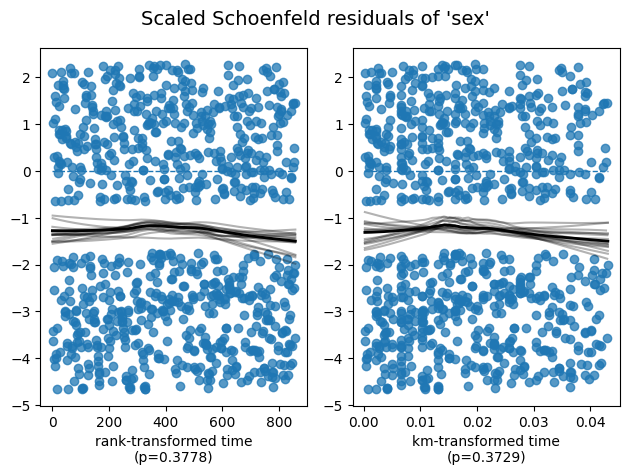

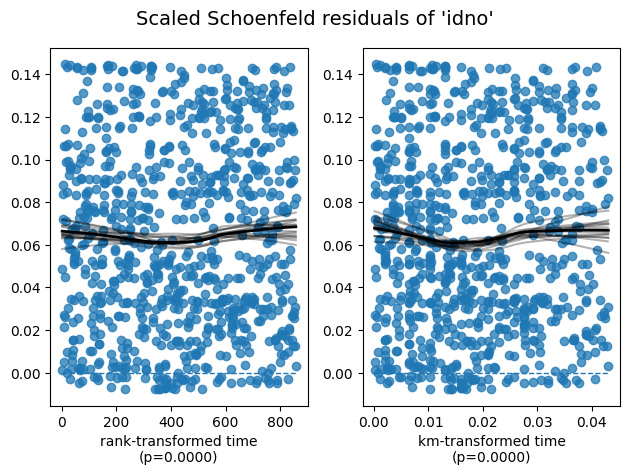

In [9]:
# Test the PH assumption and visualize Schoenfeld residuals
cph.check_assumptions(data, show_plots=True)

The Schoenfeld residual plots for the bednet variable reveal key insights regarding the proportional hazards (PH) assumption. The black smoothed line shows slight deviations from zero over time, indicating that the effect of bednet on the hazard ratio may not remain constant. While the residuals (blue dots) are generally scattered randomly, the trend in the smoothed curve suggests a violation of the PH assumption. Additionally, the p-value is highly significant (p = 0.0000), which is far below the 0.05 threshold. This small p-value strongly supports evidence against the proportional hazards assumption for bednet. In conclusion, the non-flat smoothed line and the highly significant p-value confirm that the proportional hazards assumption is violated for the bednet variable.

## 4. Cox Regression with Covariates (Cluster Effect Included)

To account for the clustering effect of geographical areas, a robust variance estimator can be used.

Steps:

Include bednet, sex, and agegp as covariates.

Add cluster as a stratification variable or use robust standard errors.

In [11]:
cph = CoxPHFitter()
cph.fit(data[['follyr', 'outcome', 'bednet', 'sex', 'agegp', 'cluster']], 
        duration_col='follyr', event_col='outcome', cluster_col='cluster')

# Summary of the model
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 26342 total observations, 25485 right-censored observations>
             duration col = 'follyr'
                event col = 'outcome'
              cluster col = 'cluster'
          robust variance = True
      baseline estimation = breslow
   number of observations = 26342
number of events observed = 857
   partial log-likelihood = -8317.51
         time fit was run = 2024-12-15 14:06:26 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
bednet     -0.18       0.83       0.08            -0.35            -0.02                 0.71                 0.98
sex        -0.06       0.94       0.06            -0.19             0.07                 0.83                 1.07
agegp      -0.55       0.58       0.04            -0.63            -0.47                 0.54                 0.62

            cmp to      z      p   -log2(p)
covariate                                  
bednet        0.00  -2.18   0.03       5.09
sex           0.00  -0.90   0.37       1.45
agegp         0.00 -14.15 <0.005     148.54
---
Concordance = 0.69
Partial AIC = 16641.01
log-likelihood ratio test = 351.40 on 3 df
-log2(p) of ll-ratio test = 249.58

Model Performance:
•	Concordance = 0.69: The model discriminates well, correctly ordering survival times 69% of the time.
•	Log-likelihood ratio test: The model is significant overall (p < 0.005), confirming that the covariates collectively explain variability in survival.


Interpretation of Findings
1.	Bednet: The use of bednets is significantly associated with reduced hazard of all-cause mortality. Individuals using bednets have a 17% lower risk of mortality compared to those who do not use bednets. This suggests that bednet use is an effective intervention.
2.	Age Group (agegp): Age group is a strong predictor of mortality, with higher age groups showing a 42% reduction in hazard. This result is highly significant (p < 0.005), indicating that individuals in older age groups may have a lower immediate hazard of mortality, possibly due to selection effects or better survival among older individuals in the sample.
3.	Sex: There is no significant association between sex and all-cause mortality (p = 0.37). This implies that, after accounting for other covariates and clustering, sex does not have a meaningful effect on the hazard of mortality in this population.
